<a href="https://colab.research.google.com/github/amitverma7426/DataScience/blob/main/Model_development_Car_Pricing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
import seaborn

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import the visualization package: seaborn
import seaborn as sns
%matplotlib inline

In [32]:
filepath = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/automobileEDA.csv"
df = pd.read_csv(filepath, header=None)
df

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
0,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.8111484863046613,...,9.0,111.0,5000.0,21,27,13495.0,11.190476190476188,Medium,0,1
2,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.8111484863046613,...,9.0,111.0,5000.0,21,27,16500.0,11.190476190476188,Medium,0,1
3,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.8226814031715521,...,9.0,154.0,5000.0,19,26,16500.0,12.36842105263158,Medium,0,1
4,2,164,audi,std,four,sedan,fwd,front,99.8,0.8486304661220567,...,10.0,102.0,5500.0,24,30,13950.0,9.791666666666666,Medium,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197,-1,95,volvo,std,four,sedan,rwd,front,109.1,0.9072561268620856,...,9.5,114.0,5400.0,23,28,16845.0,10.217391304347826,Medium,0,1
198,-1,95,volvo,turbo,four,sedan,rwd,front,109.1,0.9072561268620856,...,8.7,160.0,5300.0,19,25,19045.0,12.36842105263158,High,0,1
199,-1,95,volvo,std,four,sedan,rwd,front,109.1,0.9072561268620856,...,8.8,134.0,5500.0,18,23,21485.0,13.055555555555555,Medium,0,1
200,-1,95,volvo,turbo,four,sedan,rwd,front,109.1,0.9072561268620856,...,23.0,106.0,4800.0,26,27,22470.0,9.038461538461537,Medium,1,0


In [33]:
# Assuming 'df' is your DataFrame
first_row = df.iloc[0]

# Print the specific row
print(first_row)
print(0)


0             symboling
1     normalized-losses
2                  make
3            aspiration
4          num-of-doors
5            body-style
6          drive-wheels
7       engine-location
8            wheel-base
9                length
10                width
11               height
12          curb-weight
13          engine-type
14     num-of-cylinders
15          engine-size
16          fuel-system
17                 bore
18               stroke
19    compression-ratio
20           horsepower
21             peak-rpm
22             city-mpg
23          highway-mpg
24                price
25         city-L/100km
26    horsepower-binned
27               diesel
28                  gas
Name: 0, dtype: object
0


In [34]:
import pandas as pd

# Assuming 'df' is your DataFrame
# Replace 'index_to_remove' with the index of the row you want to remove

df.drop(0, inplace=True)

In [35]:
df

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.8111484863046613,...,9.0,111.0,5000.0,21,27,13495.0,11.190476190476188,Medium,0,1
2,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.8111484863046613,...,9.0,111.0,5000.0,21,27,16500.0,11.190476190476188,Medium,0,1
3,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.8226814031715521,...,9.0,154.0,5000.0,19,26,16500.0,12.36842105263158,Medium,0,1
4,2,164,audi,std,four,sedan,fwd,front,99.8,0.8486304661220567,...,10.0,102.0,5500.0,24,30,13950.0,9.791666666666666,Medium,0,1
5,2,164,audi,std,four,sedan,4wd,front,99.4,0.8486304661220567,...,8.0,115.0,5500.0,18,22,17450.0,13.055555555555555,Medium,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197,-1,95,volvo,std,four,sedan,rwd,front,109.1,0.9072561268620856,...,9.5,114.0,5400.0,23,28,16845.0,10.217391304347826,Medium,0,1
198,-1,95,volvo,turbo,four,sedan,rwd,front,109.1,0.9072561268620856,...,8.7,160.0,5300.0,19,25,19045.0,12.36842105263158,High,0,1
199,-1,95,volvo,std,four,sedan,rwd,front,109.1,0.9072561268620856,...,8.8,134.0,5500.0,18,23,21485.0,13.055555555555555,Medium,0,1
200,-1,95,volvo,turbo,four,sedan,rwd,front,109.1,0.9072561268620856,...,23.0,106.0,4800.0,26,27,22470.0,9.038461538461537,Medium,1,0


In [36]:
df.columns

Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28],
      dtype='int64')

In [37]:
import pandas as pd

	#symboling	normalized-losses	make	aspiration	num-of-doors	body-style	drive-wheels	engine-location	wheel-base	length	...	compression-ratio	horsepower	peak-rpm	city-mpg	highway-mpg	price	city-L/100km	horsepower-binned	diesel	gas

df.rename(columns={0: 'symboling', 1: 'normalized-losses',2: 'make', 23:'highway-mpg' ,24: 'price', 20: 'horsepower', 12: 'curb-weight', 15:'engine-size', 21: 'peak-rpm'}, inplace=True)
df

,symboling,normalized-losses,make,3,4,5,6,7,8,9,...,19,horsepower,peak-rpm,22,highway-mpg,price,25,26,27,28
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.8111484863046613,...,9.0,111.0,5000.0,21,27,13495.0,11.190476190476188,Medium,0,1
2,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.8111484863046613,...,9.0,111.0,5000.0,21,27,16500.0,11.190476190476188,Medium,0,1
3,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.8226814031715521,...,9.0,154.0,5000.0,19,26,16500.0,12.36842105263158,Medium,0,1
4,2,164,audi,std,four,sedan,fwd,front,99.8,0.8486304661220567,...,10.0,102.0,5500.0,24,30,13950.0,9.791666666666666,Medium,0,1
5,2,164,audi,std,four,sedan,4wd,front,99.4,0.8486304661220567,...,8.0,115.0,5500.0,18,22,17450.0,13.055555555555555,Medium,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197,-1,95,volvo,std,four,sedan,rwd,front,109.1,0.9072561268620856,...,9.5,114.0,5400.0,23,28,16845.0,10.217391304347826,Medium,0,1
198,-1,95,volvo,turbo,four,sedan,rwd,front,109.1,0.9072561268620856,...,8.7,160.0,5300.0,19,25,19045.0,12.36842105263158,High,0,1
199,-1,95,volvo,std,four,sedan,rwd,front,109.1,0.9072561268620856,...,8.8,134.0,5500.0,18,23,21485.0,13.055555555555555,Medium,0,1
200,-1,95,volvo,turbo,four,sedan,rwd,front,109.1,0.9072561268620856,...,23.0,106.0,4800.0,26,27,22470.0,9.038461538461537,Medium,1,0


In [38]:
from sklearn.linear_model import LinearRegression

In [39]:
X = df[['highway-mpg']]
Y = df['price']

In [40]:


lm = LinearRegression()
lm

LinearRegression()

In [41]:
lm.fit(X,Y)

LinearRegression()

In [42]:
#X = df['highway-mpg']
#Y = df['price']

In [43]:
df

,symboling,normalized-losses,make,3,4,5,6,7,8,9,...,19,horsepower,peak-rpm,22,highway-mpg,price,25,26,27,28
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.8111484863046613,...,9.0,111.0,5000.0,21,27,13495.0,11.190476190476188,Medium,0,1
2,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.8111484863046613,...,9.0,111.0,5000.0,21,27,16500.0,11.190476190476188,Medium,0,1
3,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.8226814031715521,...,9.0,154.0,5000.0,19,26,16500.0,12.36842105263158,Medium,0,1
4,2,164,audi,std,four,sedan,fwd,front,99.8,0.8486304661220567,...,10.0,102.0,5500.0,24,30,13950.0,9.791666666666666,Medium,0,1
5,2,164,audi,std,four,sedan,4wd,front,99.4,0.8486304661220567,...,8.0,115.0,5500.0,18,22,17450.0,13.055555555555555,Medium,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197,-1,95,volvo,std,four,sedan,rwd,front,109.1,0.9072561268620856,...,9.5,114.0,5400.0,23,28,16845.0,10.217391304347826,Medium,0,1
198,-1,95,volvo,turbo,four,sedan,rwd,front,109.1,0.9072561268620856,...,8.7,160.0,5300.0,19,25,19045.0,12.36842105263158,High,0,1
199,-1,95,volvo,std,four,sedan,rwd,front,109.1,0.9072561268620856,...,8.8,134.0,5500.0,18,23,21485.0,13.055555555555555,Medium,0,1
200,-1,95,volvo,turbo,four,sedan,rwd,front,109.1,0.9072561268620856,...,23.0,106.0,4800.0,26,27,22470.0,9.038461538461537,Medium,1,0


In [44]:
lm.fit(X, Y)

LinearRegression()

In [45]:
Yhat=lm.predict(X)
Yhat[0:5]

array([16236.50464347, 16236.50464347, 17058.23802179, 13771.3045085 ,
       20345.17153508])

In [46]:
#What is the value of the intercept (a)
lm.intercept_


38423.3058581574

In [47]:
#What is the value of the slope (b)
lm.coef_

array([-821.73337832])

In [48]:
Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]
Z

,horsepower,curb-weight,engine-size,highway-mpg
1,111.0,2548,130,27
2,111.0,2548,130,27
3,154.0,2823,152,26
4,102.0,2337,109,30
5,115.0,2824,136,22
...,...,...,...,...
197,114.0,2952,141,28
198,160.0,3049,141,25
199,134.0,3012,173,23
200,106.0,3217,145,27


In [49]:
df['price'] = pd.to_numeric(df['price'], errors='coerce')

In [50]:
df = df.dropna(subset=['price'])
df

,symboling,normalized-losses,make,3,4,5,6,7,8,9,...,19,horsepower,peak-rpm,22,highway-mpg,price,25,26,27,28
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.8111484863046613,...,9.0,111.0,5000.0,21,27,13495.0,11.190476190476188,Medium,0,1
2,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.8111484863046613,...,9.0,111.0,5000.0,21,27,16500.0,11.190476190476188,Medium,0,1
3,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.8226814031715521,...,9.0,154.0,5000.0,19,26,16500.0,12.36842105263158,Medium,0,1
4,2,164,audi,std,four,sedan,fwd,front,99.8,0.8486304661220567,...,10.0,102.0,5500.0,24,30,13950.0,9.791666666666666,Medium,0,1
5,2,164,audi,std,four,sedan,4wd,front,99.4,0.8486304661220567,...,8.0,115.0,5500.0,18,22,17450.0,13.055555555555555,Medium,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197,-1,95,volvo,std,four,sedan,rwd,front,109.1,0.9072561268620856,...,9.5,114.0,5400.0,23,28,16845.0,10.217391304347826,Medium,0,1
198,-1,95,volvo,turbo,four,sedan,rwd,front,109.1,0.9072561268620856,...,8.7,160.0,5300.0,19,25,19045.0,12.36842105263158,High,0,1
199,-1,95,volvo,std,four,sedan,rwd,front,109.1,0.9072561268620856,...,8.8,134.0,5500.0,18,23,21485.0,13.055555555555555,Medium,0,1
200,-1,95,volvo,turbo,four,sedan,rwd,front,109.1,0.9072561268620856,...,23.0,106.0,4800.0,26,27,22470.0,9.038461538461537,Medium,1,0


In [51]:
U = df[['price']]

In [52]:
Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]
Z

,horsepower,curb-weight,engine-size,highway-mpg
1,111.0,2548,130,27
2,111.0,2548,130,27
3,154.0,2823,152,26
4,102.0,2337,109,30
5,115.0,2824,136,22
...,...,...,...,...
197,114.0,2952,141,28
198,160.0,3049,141,25
199,134.0,3012,173,23
200,106.0,3217,145,27


In [53]:
U=  df[['price']]  #lm.fit(Z, df['price'])

In [54]:
lm.fit(Z,U)

LinearRegression()

In [55]:
lm.intercept_

array([-15806.62462633])

In [56]:
lm.coef_

array([[53.49574423,  4.70770099, 81.53026382, 36.05748882]])

In [57]:
import matplotlib.pyplot as plt


UFuncTypeError: ufunc 'multiply' did not contain a loop with signature matching types (dtype('<U2'), dtype('float64')) -> None

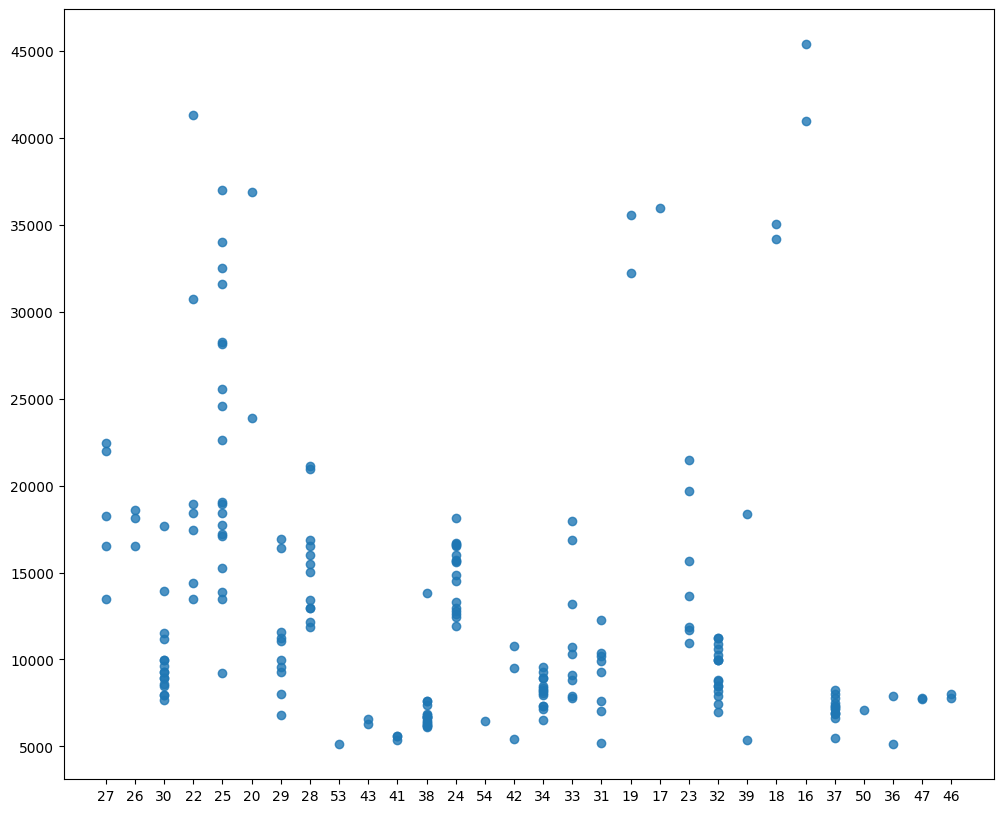

In [58]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x="highway-mpg", y="price", data=df)
plt.xlim([df["highway-mpg"].min(), df["highway-mpg"].max()])
plt.ylim(0,)

UFuncTypeError: ufunc 'multiply' did not contain a loop with signature matching types (dtype('<U6'), dtype('float64')) -> None

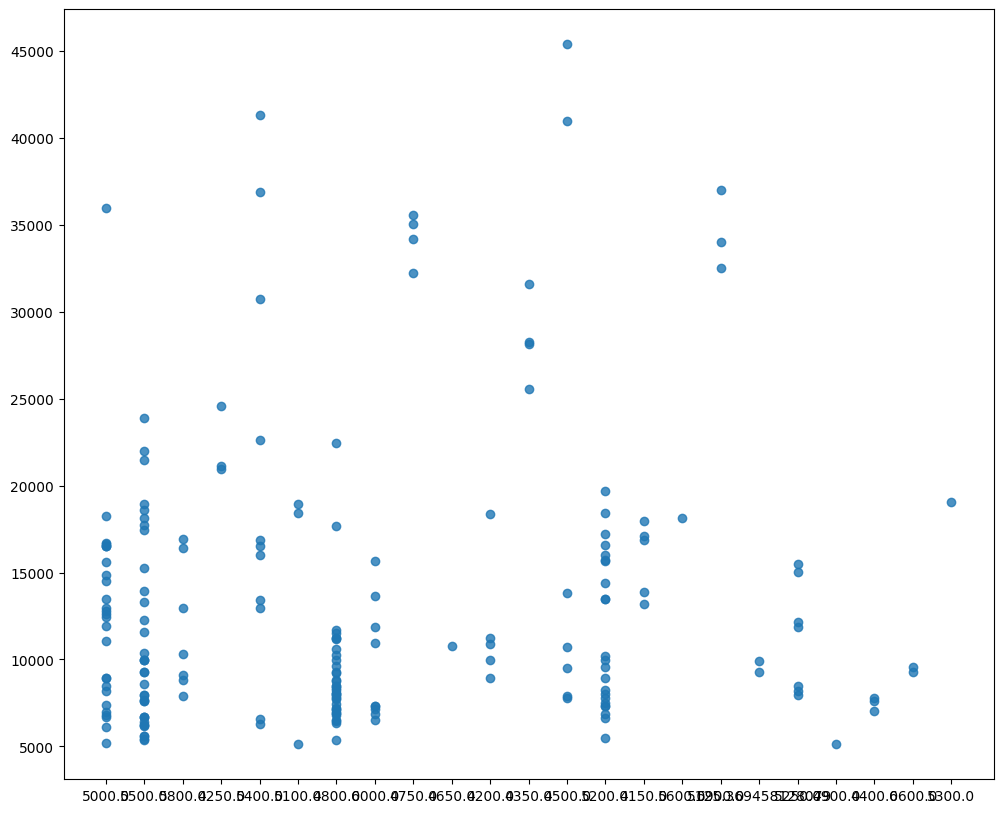

In [59]:
plt.figure(figsize=(width, height))
sns.regplot(x="peak-rpm", y="price", data=df)
plt.ylim(0,)

In [60]:
df[["peak-rpm","highway-mpg","price"]].corr()


,peak-rpm,highway-mpg,price
peak-rpm,1.000000,-0.058598,-0.101616
highway-mpg,-0.058598,1.000000,-0.704692
price,-0.101616,-0.704692,1.000000


TypeError: loop of ufunc does not support argument 1 of type str which has no callable conjugate method

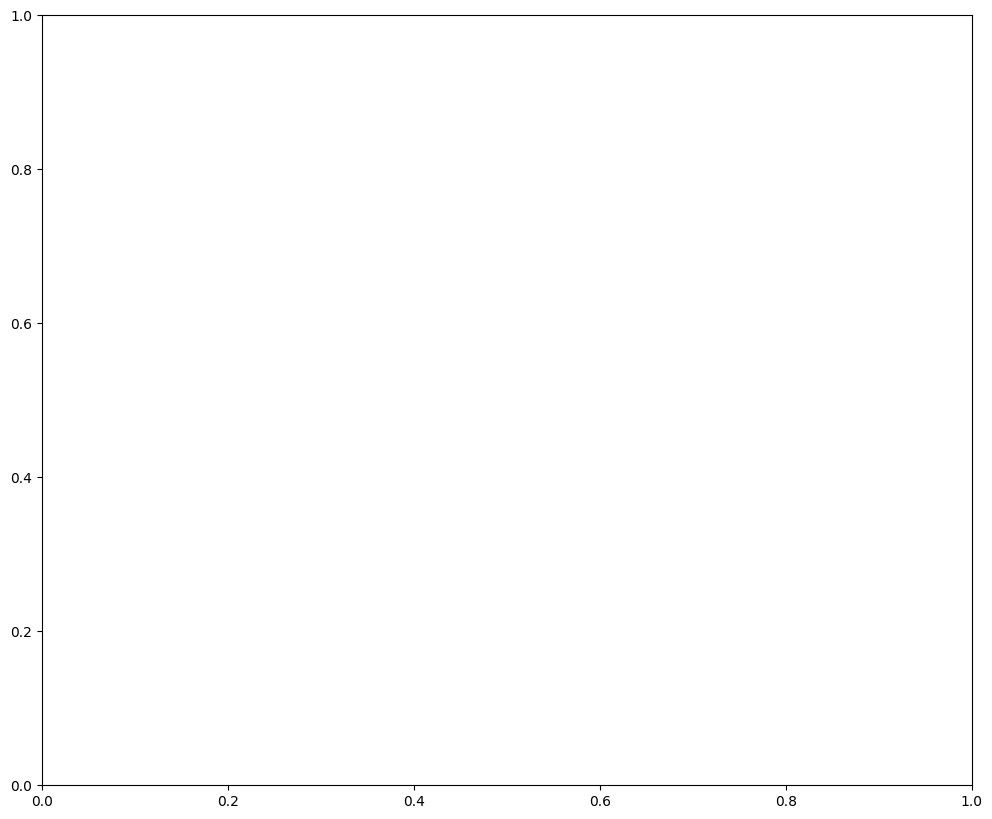

In [61]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.residplot(x=df['highway-mpg'], y=df['price'])
plt.show()

TypeError: loop of ufunc does not support argument 1 of type str which has no callable conjugate method

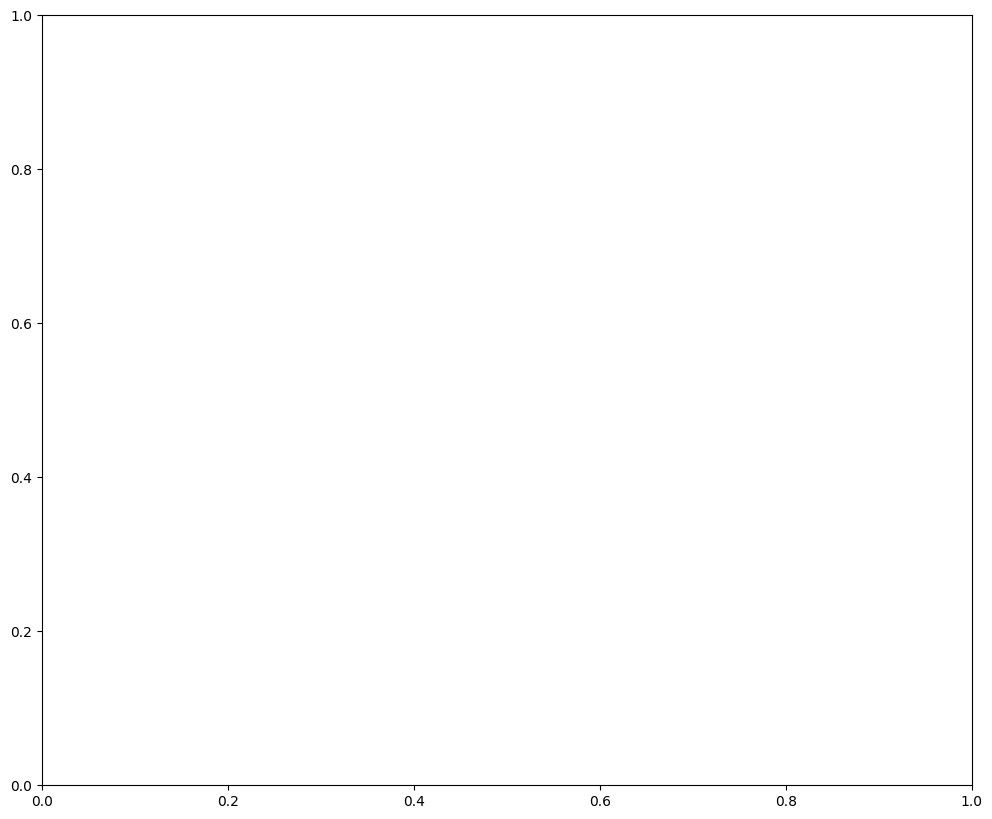

In [62]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.residplot(x=df['highway-mpg'], y=df['price'])
plt.show()

In [63]:
Y_hat = lm.predict(Z)
Y_hat

array([[13699.11161184],
       [13699.11161184],
       [19051.65470233],
       [10620.36193015],
       [15521.31420211],
       [13869.66673213],
       [15456.16196732],
       [15974.00907672],
       [17612.35917161],
       [10722.32509097],
       [10722.32509097],
       [17804.80307397],
       [18063.72662867],
       [19320.78745066],
       [26968.56492801],
       [27674.72007721],
       [28191.0677239 ],
       [  650.62317688],
       [ 5648.50489642],
       [ 5813.27443123],
       [ 5478.81383232],
       [ 5370.64136587],
       [ 8739.61952024],
       [ 5799.04215638],
       [ 5902.61157827],
       [ 5902.61157827],
       [ 9036.2046829 ],
       [11863.43973759],
       [18767.70667001],
       [ 4808.3090102 ],
       [ 5693.32889063],
       [ 4006.47212651],
       [ 6118.73075572],
       [ 6194.05397163],
       [ 6448.26982534],
       [ 6514.17763926],
       [ 9478.65495235],
       [ 9728.16310506],
       [ 9798.77861998],
       [10118.90228761],


<ipython-input-64-7377bca648c1>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
<ipython-input-64-7377bca648c1>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Y_hat, hist=False, color="b", label="Fitted Values" 

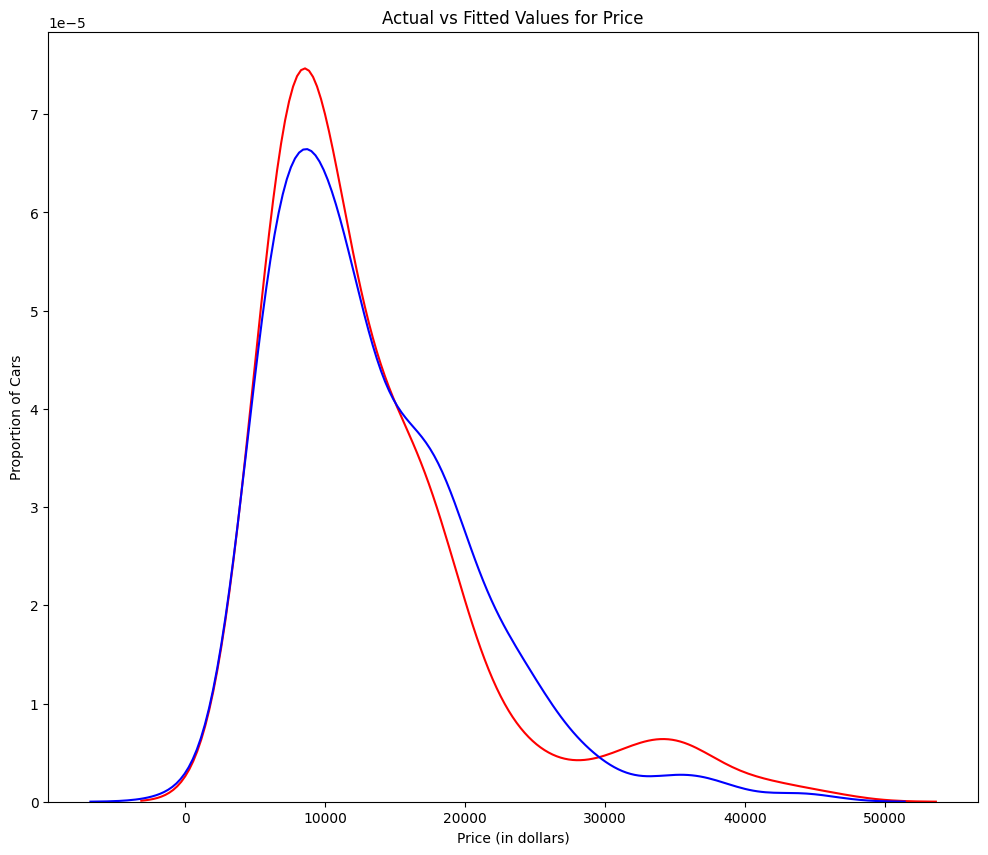

In [64]:
plt.figure(figsize=(width, height))


ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
sns.distplot(Y_hat, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

In [65]:
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')

    plt.show()
    plt.close()

In [66]:
x = df['highway-mpg']
y = df['price']


In [67]:
x = x.astype(float)
y = y.astype(float)

In [68]:
# Here we use a polynomial of the 3rd order (cubic)
f = np.polyfit(x, y, 3)
p = np.poly1d(f)
print(p)

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


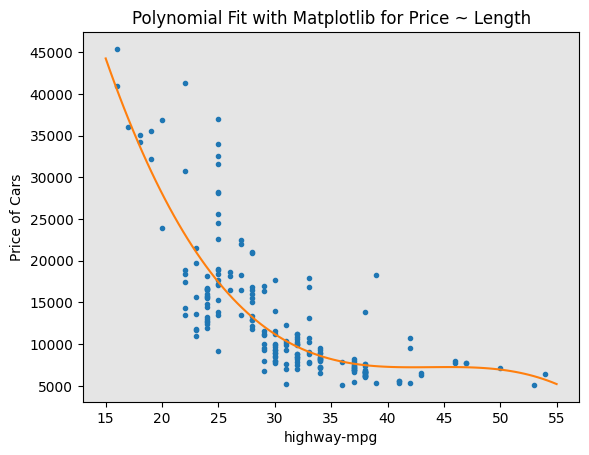

In [69]:
PlotPolly(p, x, y, 'highway-mpg')


In [70]:
np.polyfit(x, y, 3)

array([-1.55663829e+00,  2.04754306e+02, -8.96543312e+03,  1.37923594e+05])

In [71]:
from sklearn.preprocessing import PolynomialFeatures

In [72]:
pr=PolynomialFeatures(degree=2)
pr

PolynomialFeatures()

In [73]:
Z_pr=pr.fit_transform(Z)

In [74]:
Z.shape


(201, 4)

In [75]:
Z_pr.shape

(201, 15)

In [76]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler


In [77]:
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())]

In [78]:
pipe=Pipeline(Input)
pipe

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [79]:
Z = Z.astype(float)
pipe.fit(Z,y)

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [80]:
ypipe=pipe.predict(Z)
ypipe[0:4]

array([13102.74784201, 13102.74784201, 18225.54572197, 10390.29636555])

In [85]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Define the pipeline
pipeline = Pipeline([
    ('scale', StandardScaler()),
    ('polynomial', PolynomialFeatures(include_bias=False)),
    ('model', LinearRegression())
])

# You can fit the pipeline to your data
Z = Z.astype(float)
pipeline.fit(Z, y)

# And use it to make predictions
predictions = pipeline.predict(Z)

In [86]:
predictions[0:4]

array([13102.74784201, 13102.74784201, 18225.54572197, 10390.29636555])

In [88]:
Input=[('scale', StandardScaler()),
    ('polynomial', PolynomialFeatures(include_bias=False)),
    ('model', LinearRegression())]

pipe=Pipeline(Input)

pipe.fit(Z,y)

ypipe=pipe.predict(Z)
ypipe[0:10]


array([13102.74784201, 13102.74784201, 18225.54572197, 10390.29636555,
       16136.29619164, 13880.09787302, 15041.58694037, 15457.93465485,
       17974.49032347, 10510.56542385])

In [89]:
#highway_mpg_fit
lm.fit(X, Y)
# Find the R^2
print('The R-square is: ', lm.score(X, Y))



The R-square is:  0.4965911884339176


In [90]:
Yhat=lm.predict(X)
print('The output of the first four predicted value is: ', Yhat[0:4])

The output of the first four predicted value is:  [16236.50464347 16236.50464347 17058.23802179 13771.3045085 ]


In [91]:
from sklearn.metrics import mean_squared_error

In [92]:
mse = mean_squared_error(df['price'], Yhat)
print('The mean square error of price and predicted value is: ', mse)

The mean square error of price and predicted value is:  31635042.944639888
